<a href="https://colab.research.google.com/github/sangjin94/itwill-python/blob/main/ml03_train_test_set_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 훈련 셋과 테스트 셋을 나누는 방법
  * 순차적 추출 (sequential sampling)
  * 임의 추출 (random sampling)
  * 층화 추출 (stratified sampling)
* 분류 모델 평가 지표
  * 정확도(accuracy)
  * 정밀도
  * 재현율
  * F1-score
* 특성 스케일링(feature scaling)
  * 표준화(standardization)
  * 정규화(normalization)

# 필요한 모듈 import

In [60]:
import numpy as np # ndarray 함수, 메서드
import pandas as pd # Series, DataFrame 함수, 메서드 
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier # KNN 분류기(모델, 알고리즘)
from sklearn.model_selection import train_test_split # 훈련/테스트 셋 분리 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report # 모델 평가 지표
from sklearn.preprocessing import StandardScaler,MinMaxScaler # 특성 스케일링 

# 데이터 준비

* fish.csv 파일 :  어종 , 생선 특성(무게, 길이,...)
  * 문제를 간단히 하기 위해서, 어종 2개(Bream, Smelt)와 특성 2개 ( Weight,Length) 사용

In [5]:
fish_csv='https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [6]:
fish = pd.read_csv(fish_csv) # CSV 파일 ---> DataFrame 생성 

In [7]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [8]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [11]:
# 타겟 벡터(1차원 배열)
# 어종이 Bream 또는 Smelt 인 Species 컬럼을 선택해서 numpy 배열로 변환
y = fish.loc[fish.Species.isin(['Bream','Smelt']),'Species'].values
y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [12]:
y.shape #> 원소가 49개인 1차원 배열

(49,)

In [16]:
# 타겟의 레이블 개수
np.unique(y,return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([35, 14]))

In [19]:
# 특성 행렬(feature matrix)
# 어종이 Bream 또는 Smelt 인 Weight 컬럼과 Length 컬럼을 선택하고 numpy 배열로 변환
X=fish.loc[fish.Species.isin(['Bream','Smelt']),['Weight','Length']].values
X

array([[ 242. ,   25.4],
       [ 290. ,   26.3],
       [ 340. ,   26.5],
       [ 363. ,   29. ],
       [ 430. ,   29. ],
       [ 450. ,   29.7],
       [ 500. ,   29.7],
       [ 390. ,   30. ],
       [ 450. ,   30. ],
       [ 500. ,   30.7],
       [ 475. ,   31. ],
       [ 500. ,   31. ],
       [ 500. ,   31.5],
       [ 340. ,   32. ],
       [ 600. ,   32. ],
       [ 600. ,   32. ],
       [ 700. ,   33. ],
       [ 700. ,   33. ],
       [ 610. ,   33.5],
       [ 650. ,   33.5],
       [ 575. ,   34. ],
       [ 685. ,   34. ],
       [ 620. ,   34.5],
       [ 680. ,   35. ],
       [ 700. ,   35. ],
       [ 725. ,   35. ],
       [ 720. ,   35. ],
       [ 714. ,   36. ],
       [ 850. ,   36. ],
       [1000. ,   37. ],
       [ 920. ,   38.5],
       [ 955. ,   38.5],
       [ 925. ,   39.5],
       [ 975. ,   41. ],
       [ 950. ,   41. ],
       [   6.7,    9.8],
       [   7.5,   10.5],
       [   7. ,   10.6],
       [   9.7,   11. ],
       [   9.8,   11.2],


In [20]:
X.shape #> (49,2) shape의 2차원 배열

(49, 2)

# 데이터와 타겟을 훈련 셋/테스트 셋으로 분리


`X`: 특성 행렬(feature matrix), `y`= 타겟 벡터(target vector)

# sequential sampling

In [26]:
# 훈련 셋과 테스트 셋을 7:3 비율로 나누기 위해서 
num_trains= 35 # 훈련 셋 개수

In [27]:
X_train=X[:num_trains] # 훈련 셋
X_test=X[num_trains:] # 테스트셋
y_train=y[:num_trains] # 훈련 레이블
y_test=y[num_trains:] # 테스트 레이블

In [28]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [29]:
y_train.shape,y_test.shape

((35,), (14,))

데이터가 무작위로 섞여있지 않고 어종에 대해서 정렬된 상태였기 때문에, 훈련셋/레이블에는 도미(Bream)만 선택되고, 테스트 셋/레이블에는 빙어(Smelt)만 선택됨. - **샘플링 편향**

In [30]:
np.unique(y_train,return_counts=True)

(array(['Bream'], dtype=object), array([35]))

In [31]:
np.unique(y_test,return_counts=True)

(array(['Smelt'], dtype=object), array([14]))

# KNN 모델 훈련, 평가

In [32]:
knn_clf= KNeighborsClassifier()# KNN 모델 생성

In [33]:
knn_clf.fit(X=X_train,y=y_train) # 모델 훈련, fitting

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
# 훈련 셋 예측 결과
train_pred=knn_clf.predict(X=X_train)
train_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [35]:
train_acc=np.mean(y_train==train_pred) # 훈련 셋에서의 정확도
train_acc

1.0

In [36]:
# 훈련 셋 예측 결과
test_pred=knn_clf.predict(X=X_test)
test_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [37]:
test_acc=np.mean(y_test==test_pred) # 훈련 셋에서의 정확도
test_acc

0.0

`sklearn.model_selection_train_test_split` 함수를 사용한 훈련/테스트 셋 분리 sequential sampling

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,    # 특성 행렬, 타겟 벡터
                                               train_size=35, # 훈련 셋 원소 개수
                                               shuffle=False) # 데이터를 랜덤하게 섞을 지 말 지 결정

In [40]:
X_train.shape,X_test.shape

((35, 2), (14, 2))

In [41]:
y_train.shape,y_test.shape

((35,), (14,))

In [42]:
y_test

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

# Random Sampling(임의 추출)

In [43]:
idx=np.arange(49)
print(idx)
np.random.shuffle(idx)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[45 11 21 38 39  2 25  6 33 31 37 28  7 27  9 30 24 42 48 16 22 44 35 26
 46 41 36 34 47 14 10  4  5 13 17  0 43 29  3 18 20 12 32 15 40  1 23  8
 19]


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=35, # 훈련 셋 크기
                                               shuffle=True, # 무작위로 섞음. True는 생략가능(default)
                                               random_state=42) # 난수 Seed 설정

In [45]:
# train/test의 모양(shape) 확인
X_train.shape,X_test.shape

((35, 2), (14, 2))

In [46]:
y_train.shape,y_test.shape

((35,), (14,))

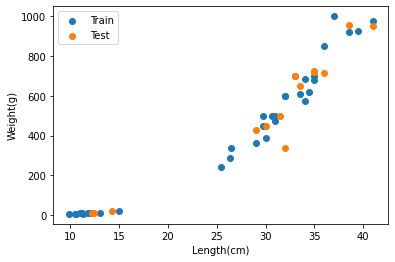

In [47]:
# x_train,x_test 시각화(Weight~Length)
plt.scatter(X_train[:,1],X_train[:,0],label='Train')
plt.scatter(X_test[:,1],X_test[:,0],label='Test')
plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

# 모델 훈련, 평가

In [49]:
knn_clf=KNeighborsClassifier() # KNN모델 생성

In [51]:
knn_clf.fit(X=X_train,y=y_train) # 모델을 훈련 셋(특성과 레이블)에 fitting

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
# 훈련 셋에서의 평가
train_pred=knn_clf.predict(X=X_train) # 훈련 셋 예측값
train_acc=np.mean(y_train==train_pred) # 훈련 셋 정확도
train_acc

1.0

In [55]:
confusion_matrix(y_true=y_train,y_pred=train_pred) # 훈련 셋 오차(혼동) 행렬

array([[24,  0],
       [ 0, 11]])

In [56]:
# 테스트 셋에서의 평가
test_pred=knn_clf.predict(X=X_test) # 테스트 셋 예측값
test_acc=np.mean(y_test==test_pred)  # 테스트 셋 정확도
test_acc

1.0

In [57]:
confusion_matrix(y_test,test_pred)

array([[11,  0],
       [ 0,  3]])

In [58]:
report=classification_report(y_test,test_pred)
print(report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
       Smelt       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



**분류 평가 지표(classification metrics)**

* 용어 정리
  * TN(True Negative, 진짜 음성): 실제 음성(negative)인 것을 음성으로 맞게 예측
  * FP(False Positive, 가짜 양성): 실제 음성(negative)인 것을 양성(positive)으로 틀리게 예측.
  * FN(False Negative, 가짜 음성): 실제 양성(positive)인 것을 음성(negative)으로 틀리게 예측
  * TP(True Positive, 진짜 양성): 실제 양성(positive)인 것을 양성으로 맞게 예측.

* 정확도(accuracy): 샘플들을 정확하게 분류한 비율. 전체 샘플들 중 정답의 비율.
> accuracy = (TN+TP) / (TN + TP + FN + FP)
* 정밀도(precision): 양성 예측들 중 정답 비율. 양성으로 예측한 샘플들 중에서 정확하게 예측한 비율.
> precision = TP / (FP + TP) 
* 재현율(recall): 실제 양성 샘플들 중 정답 비율. 실제로 양성인 샘플들 중에서 정확하게 예측한 비율.
> recall= TP / (FN + TP)
* F1-score: 정밀도와 재현율의 조화 평균(역수들의 평균의 역수)
> f1= 2/(1/precission +1/recall) 

# Stratified Sampling (층화 추출)

데이터 셋에서 각 클래스의 비율이 훈련 셋과 테스트 셋에서 같게 유지가 되도록 샘플링하는 방법. 

In [72]:
# 훈련 특성, 테스트 특성, 훈련 타겟, 테스트 타겟
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.3, 
                                               stratify=y, # 전체데이터의 레이블 데이터셋
                                               random_state=42)
# test_size: 정수이면 , 테스트 셋의 크기(샘플 개수).
#   0~1 사이의 실수이면, 전체 샘플 중 테스트 셋의 비율.
# train_size: 정수이면 , 훈련 셋의 크기(샘플 개수).
#   0~1 사이의 실수이면, 전체 샘플 중 훈련 셋의 비율.
#> train_test_split() 함수를 호출할 때는 test_size 또는 train_size중 하나만 설정 하면 나머지는 자동으로 계산.
# stratify: 층화 추출의 기준이 되는( 각 클래스의 비율을 알 수 있는) 1d array.

훈련 셋과 테스트 셋의 shape 확인 

In [64]:
X_train.shape, X_test.shape

((34, 2), (15, 2))

In [65]:
y_train.shape,y_test.shape

((34,), (15,))

훈련 레이블과 테스트 레이블에서 도미(bream)과 빙어(smelt)의 비율 확인

In [66]:
np.unique(y_train,return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 10]))

In [68]:
24/34, 10/34   # 훈련 레이블에서  도미(bream), 빙어(smelt) 비율

(0.7058823529411765, 0.29411764705882354)

In [67]:
np.unique(y_test,return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  4]))

In [69]:
11/15,4/15  # 테스트 레이블에서  도미(bream), 빙어(smelt) 비율

(0.7333333333333333, 0.26666666666666666)

# 모델 훈련 평

In [73]:
knn_clf=KNeighborsClassifier() # 모델 생성

In [74]:
knn_clf.fit(X_train,y=y_train) # 모델 훈련

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
# 훈련 셋에서 평가

train_pred=knn_clf.predict(X_train) # 훈련셋 예측값
accuracy_score(y_true=y_train,y_pred=train_pred) # 훈련 셋 정확도

1.0

In [77]:
# 테스트 셋에서 평가
test_pred=knn_clf.predict(X_test) # 테스트 셋 예측값
accuracy_score(y_true=y_test,y_pred=test_pred)# 테스트셋 정확도

1.0

In [79]:
confusion_matrix(y_test,test_pred) # 테스트 셋 오차(혼동) 행렬

array([[11,  0],
       [ 0,  4]])

# 특성 스케일링(feature scaling) 

## 특성 스케일링의 필요성

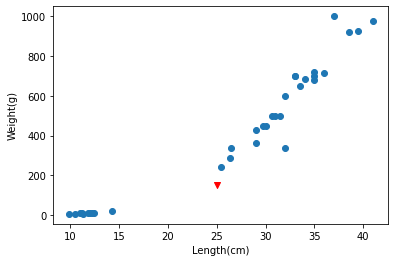

In [120]:
# 훈련 셋(x축: Length, y축: Weight) 시각화
plt.scatter(X_train[:,1],X_train[:,0],label='Train')

# 가상의 테스트 데이터(25cm, 150g 생선) 시각화
plt.scatter(25,150,label='Unknown',marker='v',color='red')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [83]:
# 가상의 데이터를 만들고, 위에서 훈련된 knn_clf로 예측값을 찾아보세요. 
test_fish=[[150,25]] # 150g, 25cm 가상의 생선 ---> (1,2) shpqe을 갖는 2d array
knn_clf.predict(test_fish)

array(['Smelt'], dtype=object)

In [84]:
# 가상의 테스트 데이터의 5개의 가장 가까운 이웃들(nearest neighbors)의 배열
distances,neigh_indices=knn_clf.kneighbors(X=test_fish)
print(distances) #> (1,5) shape의 2d array
print(neigh_indices) # (1,5) shape의 2d array

[[ 92.00086956 130.73859415 137.17988191 138.39320793 140.00603558]]
[[ 2  5 26 32 11]]


In [85]:
# 5개의 가장 가까운 이웃들
near_neigh=X_train[neigh_indices[0]]
near_neigh

array([[242. ,  25.4],
       [ 19.7,  14.3],
       [ 13.4,  12.4],
       [ 12.2,  12.2],
       [290. ,  26.3]])

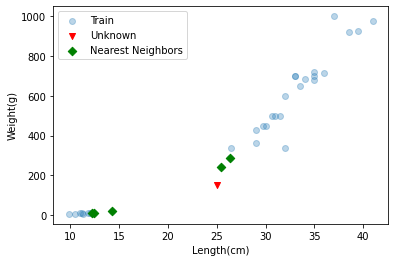

In [96]:
# 훈련 셋(x축: Length, y축: Weight) 시각화
plt.scatter(X_train[:,1],X_train[:,0],label='Train',alpha=0.3)

# 가상의 테스트 데이터(25cm, 150g 생선) 시각화
plt.scatter(25,150,label='Unknown',marker='v',color='red')

# 가상의 생선에서 가장 가까운 이웃(훈련 셋)들을 시각화
plt.scatter(near_neigh[:,1],near_neigh[:,0], label='Nearest Neighbors',marker='D',color='green')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.legend()
plt.show()

* 생선의 두 특성(길이,무게)는 서로 단위(cm,g)가 다르기 때문에, 값의 범위도 매우 다름. 
  * 길이 범위: 0 ~ 50cm, 무게 범위: 0 ~ 1000 g
  * 특성(변수)들의 스케일이 다름!
  * 가장 가까운 이웃을 찾기 위해서 거리를 계산할 때, 생선의 길이가 거리에 미치는 영향은 생선의 무게가 거리에 미치는 영향에 비해 작음. 
  * 예측을 할 때 거리 계산에 영향이 적은 변수(특성)는 무시되기 쉬움.
  * 예측 결과가 부정확해 질 수 있음.
* KNN과 같이 거리 기반의 머신 러닝 알고리즘에서는. 모델을 훈련하기 전에 모든 특성(변수)들을 비슷한 스케일이 되도록 전처리(preprocessing)를 할 필요가 있음!
  * **표준화(standardization)**: *훈련 셋*의 평균과 표준편차를 사용해서, 평균이 0이 되고 표준편차가 1이 되도록 스케일을 변환하는 것. 
  * **정규화(normalization)**: *훈련 셋*의 최솟값과 최댓값을 사용해서, 최솟값은 0이 되고 최댓값은 1이 되도록 스케일을 변환하는 것.

# 표준화

In [97]:
std_scaler=StandardScaler() # 특성 스케일 변환기 생성

In [98]:
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
# fit이 끝나고 나면, mean_(평균),var_(분산) 변수가 생김
print(std_scaler.mean_)
print(std_scaler.var_)

[425.92352941  26.47352941]
[1.04229779e+05 1.03194299e+02]


In [100]:
print(np.mean(X_train,axis=0))
print(np.var(X_train,axis=0))

[425.92352941  26.47352941]
[1.04229779e+05 1.03194299e+02]


In [102]:
X_train_scaled=std_scaler.transform(X=X_train) # 훈련 셋의 특성들을 scaling
X_train_scaled[:5]

array([[ 0.89230202,  0.93778693],
       [-0.19490239,  0.24870607],
       [-0.56969366, -0.10567837],
       [-1.28861145, -1.44446404],
       [ 0.5391929 ,  0.54402644]])

In [110]:
# 훈련 셋인 경우에는 (1) 평균과 표준편차를 계산(fit) 하고, (2) 데이터의 스케일을 변환(transform)을
# 한 번에 수행하는 fit_transform() 메서드를 사용할 수 있다.
X_train_scaled= std_scaler.fit_transform(X_train)
X_train_scaled[:5]

array([[ 0.89230202,  0.93778693],
       [-0.19490239,  0.24870607],
       [-0.56969366, -0.10567837],
       [-1.28861145, -1.44446404],
       [ 0.5391929 ,  0.54402644]])

In [109]:
# (주의) 테스트 셋에서는 절대로 fit 또는 fit_transform 메서드를 호출하면 안됨!
# 테스트 셋은 훈련 셋의 평균과 표준편차를 이용해서 스케일 변환만 수행해야 함. transform 메서드만 사용!
X_test_scaled= std_scaler.transform(X_test)
X_test_scaled[:5]

array([[-1.25763696, -1.12945564],
       [ 1.31355502,  0.93778693],
       [ 1.63878711,  1.18388724],
       [ 0.60114187,  0.79012675],
       [-1.29759405, -1.56259218]])

In [112]:
# 가상의 테스트 데이터 스케일링 
test_fish_scaled= std_scaler.transform(test_fish)
test_fish_scaled

array([[-0.85465892, -0.14505442]])

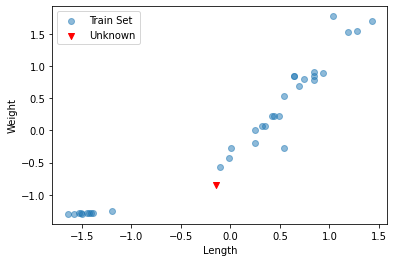

In [113]:
# 표준화가 끝난 훈련 셋 시각화 
plt.scatter(X_train_scaled[:,1],X_train_scaled[:,0],label='Train Set',alpha=0.5)
# 표준화 스케일 변환된 가상의 생선 데이터 시각화 
plt.scatter(test_fish_scaled[:,1],test_fish_scaled[:,0],label='Unknown',marker='v',color='red')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()


# 스케일 변환된 훈련 셋과 테스트 셋으로 모델 훈련 , 평가

In [114]:
knn_clf=KNeighborsClassifier() # 모델 생성

In [115]:
knn_clf.fit(X=X_train_scaled,y=y_train) # 모델 훈련

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [116]:
# 가상의 테스트 생선의 예측값 
knn_clf.predict(X=test_fish_scaled)

array(['Bream'], dtype=object)

In [118]:
# 훈련 셋 평가
train_pred=knn_clf.predict(X_train_scaled) # 표준화된 훈련 셋의 예측값
accuracy_score(y_true=y_train,y_pred=train_pred)

1.0

In [119]:
# 테스트 셋 평가
test_pred=knn_clf.predict(X_test_scaled) # 표준화된 테스트 셋의 예측값
accuracy_score(y_true=y_test,y_pred=test_pred)

1.0

## `MinMaxScaler` 클래스를 사용

* 훈련 셋과 테스트 셋을 스케일링
* 훈련 셋 정확도, 테스트 셋 정확도 계산

In [124]:
Scaler=MinMaxScaler()

In [125]:
Scaler.fit(X=X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [126]:
X_train_scaled=Scaler.transform(X_train)

In [128]:
knn_clf=KNeighborsClassifier()

In [130]:
knn_clf.fit(X=X_train_scaled,y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [133]:
train_pred=knn_clf.predict(X_train_scaled)

In [140]:
test_pred=knn_clf.predict(X_test_scaled)

In [139]:
np.mean(test_pred==y_test)

1.0

In [138]:
X_test_scaled=Scaler.transform(X_test)

# sklearn의 iris데이터 셋